<a href="https://colab.research.google.com/github/SuprioKhan/Vaccine-Prediction-/blob/main/Sindh%26Punjab_pcv_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import important lib

plot sindh and punjab data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/PCV.xlsx"
data = pd.ExcelFile(file_path)
data_s = data.parse("pcv-sindh-4")
data_p = data.parse("punjab-pcv-4")


# Inspect the first few rows
print("Initial Dataset:")
print(data_s)
print(data_p)

Initial Dataset:
      prov_id prov_name  dist_id        dist_name  tehsil_id      tehsil_name  \
0           2     Sindh    10015  Karachi Central       4276          Gulberg   
1           2     Sindh    10015  Karachi Central       4246      Liaquatabad   
2           2     Sindh    10015  Karachi Central       4278      New Karachi   
3           2     Sindh    10015  Karachi Central       4275  North Nazimabad   
4           2     Sindh    10013     Karachi East         67    Gulshan Iqbal   
...       ...       ...      ...              ...        ...              ...   
3425        2     Sindh      165           Sukkur        476         Salehpat   
3426        2     Sindh      172       Tharparkar       4243          Chachro   
3427        2     Sindh      172       Tharparkar       4241            Diplo   
3428        2     Sindh      172       Tharparkar       4240            Mithi   
3429        2     Sindh      172       Tharparkar       4242      Nagarparkar   

     trans

In [ ]:
# Using 'transaction_month' as the date column and 'total_quantity' as the value column
data_s = data_s.rename(columns={'transaction_month': 'ds', 'total_quantity': 'y'})

# Convert the 'ds' column to datetime format
data_s['ds'] = pd.to_datetime(data_s['ds'])
# Using 'transaction_month' as the date column and 'total_quantity' as the value column
data_p = data_p.rename(columns={'transaction_month': 'ds', 'total_quantity': 'y'})

# Convert the 'ds' column to datetime format
data_p['ds'] = pd.to_datetime(data_p['ds'])

In [ ]:
import plotly.express as px
# Extract the year from the 'ds' column and create a new 'year' column
data_s['year'] = data_s['ds'].dt.year

# Group by year and sum the total quantities
total_quantity_per_year = data_s.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(total_quantity_per_year,
             x='year',
             y='y',
             title='Total Vaccine Quantity Distributed per Year Sindh',
             labels={'year': 'Year', 'y': 'Total Quantity'},
             color='year',  # Color bars by year
             text='y'  # Display total quantity on top of each bar
            )

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()


In [ ]:
import plotly.express as px

# Extract the year from the 'ds' column and create a new 'year' column
data_s['year'] = data_s['ds'].dt.year

# Filter data to exclude the year 2020
filtered_data_s = data_s[data_s['year'] >= 2021]

# Group by year and sum the total quantities
total_quantity_per_year = filtered_data_s.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(
    total_quantity_per_year,
    x='year',
    y='y',
    title='Total Vaccine Quantity Distributed per Year (2021 onwards) Sindh',
    labels={'year': 'Year', 'y': 'Total Quantity'},
    color='year',  # Color bars by year
    text='y'  # Display total quantity on top of each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()


In [ ]:
import plotly.express as px

# Extract the year from the 'ds' column and create a new 'year' column
data_p['year'] = data_p['ds'].dt.year

# Filter data to exclude the year 2020
filtered_data_p = data_p[data_p['year'] >= 2021]

# Group by year and sum the total quantities
total_quantity_per_year = filtered_data_p.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(
    total_quantity_per_year,
    x='year',
    y='y',
    title='Total Vaccine Quantity Distributed per Year (2021 onwards) Punjab',
    labels={'year': 'Year', 'y': 'Total Quantity'},
    color='year',  # Color bars by year
    text='y'  # Display total quantity on top of each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()


## Sindh data

Sindh Data

In [ ]:
# Concatenate the data_s and data_p datasets into one
#data = pd.concat([filtered_data_s, filtered_data_p])
data= data_s
# Ensure 'ds' is in datetime format for both datasets
data['ds'] = pd.to_datetime(data['ds'])

# Sort the data chronologically
data = data.sort_values(by='ds')

# Make sure 'y' is numeric (vaccine quantities)
data['y'] = pd.to_numeric(data['y'], errors='coerce')  # Convert non-numeric to NaN

# Step 2: Calculate the rate of change (percentage) in vaccine quantity
#data['rate_of_change'] = data['y'].pct_change() * 100


In [ ]:
data.head()

,prov_id,prov_name,dist_id,dist_name,tehsil_id,tehsil_name,ds,item_id,item_name,y,year
0,2,Sindh,10015,Karachi Central,4276,Gulberg,2021-01-01,87,Pneumococcal-4 (PCV13),1000,2021
23,2,Sindh,173,Thatta,4250,Mirpur Sakro,2021-01-01,87,Pneumococcal-4 (PCV13),150,2021
22,2,Sindh,173,Thatta,4255,Kharo Chhan,2021-01-01,87,Pneumococcal-4 (PCV13),50,2021
21,2,Sindh,173,Thatta,4254,Keti Bander,2021-01-01,87,Pneumococcal-4 (PCV13),50,2021
20,2,Sindh,173,Thatta,4253,Ghora Bari,2021-01-01,87,Pneumococcal-4 (PCV13),100,2021


In [ ]:
import plotly.express as px

# Extract the year from the 'ds' column and create a new 'year' column
data['year'] = data['ds'].dt.year

# Filter data to exclude the year 2020
filtered_data = data[data['year'] > 2020]

# Group by year and sum the total quantities
total_quantity_per_year = filtered_data.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(
    total_quantity_per_year,
    x='year',
    y='y',
    title='Total Vaccine Quantity Distributed per Year)',
    labels={'year': 'Year', 'y': 'Total Quantity'},
    color='year',  # Color bars by year
    text='y'  # Display total quantity on top of each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()


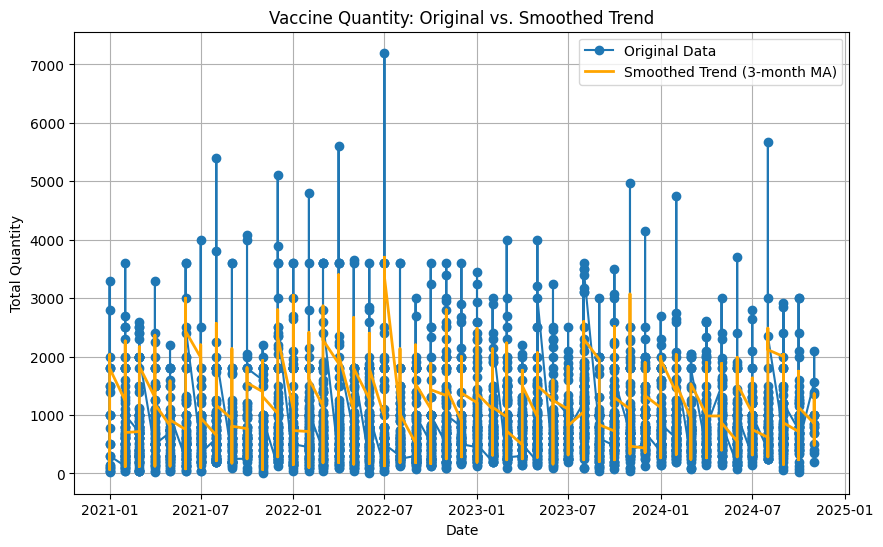

In [ ]:
# Step 2: Apply a moving average for smoothing (e.g., 3-month window)
data['smoothed'] = data['y'].rolling(window=3).mean()

# Step 3: Plot the original data and the smoothed trend
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Original Data', marker='o')
plt.plot(data['ds'], data['smoothed'], label='Smoothed Trend (3-month MA)', color='orange', linewidth=2)
plt.title('Vaccine Quantity: Original vs. Smoothed Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Assuming 'data' is your DataFrame with 'ds' (date) and 'y' (vaccine quantities)

# Step 1: Ensure the 'ds' column is in datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
data_monthly = data.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()

# Step 3: Apply a 3-month moving average for smoothing
data_monthly['smoothed'] = data_monthly['y'].rolling(window=3).mean()

# Step 4: Create an interactive plot using Plotly
fig = go.Figure()

# Add original data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['y'],
        mode='lines+markers',
        name='Original Data',
        line=dict(color='blue'),
        marker=dict(size=6)
    )
)

# Add smoothed data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['smoothed'],
        mode='lines',
        name='Smoothed Trend (2-month MA)',
        line=dict(color='orange', width=3)
    )
)

# Customize the layout
fig.update_layout(
    title='Interactive Graph: Original vs. Smoothed Trend (2-month Moving Average)',
    xaxis_title='Date',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: Dark theme
    legend=dict(title='Legend', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show the figure
fig.show()


<ipython-input-72-7f951f2c0f12>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<ipython-input-73-91ed7733454f>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-91ed7733454f>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



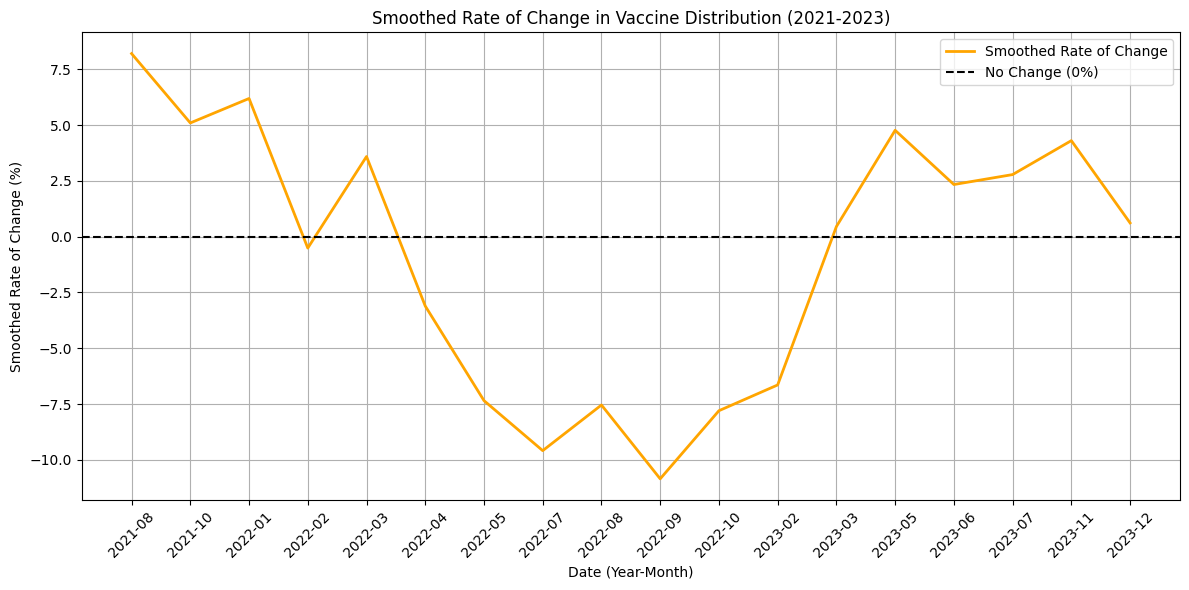

In [ ]:
# Step 1: Convert the 'ds' column to datetime format if not already done
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Create a new column for the year and month (combining them) or just for month
data['year_month'] = data['ds'].dt.to_period('M')  # This will create a 'year-month' period

# Step 3: Group by year_month and sum the 'y' (total_quantity) values
grouped_data = data.groupby('year_month')['y'].sum().reset_index()

# Step 4: Calculate the rate of change
grouped_data['rate_of_change'] = grouped_data['y'].pct_change() * 100

# Step 5: Filter extreme rate of change values
filtered_grouped_data = grouped_data[(grouped_data['rate_of_change'] >= -20) & (grouped_data['rate_of_change'] <= 20)]

# Step 6: Apply a smoothing function (moving average) to the rate_of_change column
filtered_grouped_data['smoothed_rate_of_change'] = filtered_grouped_data['rate_of_change'].rolling(window=5).mean()

# Step 7: Zoom in on a specific time period (optional)
filtered_grouped_data_zoomed = filtered_grouped_data[(filtered_grouped_data['year_month'] >= '2021-01') & (filtered_grouped_data['year_month'] <= '2023-12')]

# Now continue with the original code from cell ipython-input-15-b7cedd9c5031:
filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()

# Step 8: Plot the smoothed rate of change over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_grouped_data_zoomed['year_month'].astype(str), filtered_grouped_data_zoomed['smoothed_rate_of_change'], label='Smoothed Rate of Change', color='orange', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', label='No Change (0%)')
plt.title('Smoothed Rate of Change in Vaccine Distribution (2021-2023)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Smoothed Rate of Change (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 1: Filter the dataset to select specific data
# Assuming the 'transaction_month' column is in datetime format and 'total_quantity' column holds the quantity
# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
# Exclude the 'year_month' column from the aggregation
data = data.groupby(pd.Grouper(key='ds', freq='M'))[['y']].sum().reset_index()
# Filter data based on transaction month and total quantity
# Example: Filter data from 2021 onwards, and only for rows where total_quantity is above a certain threshold
filtered_data = data[(data['ds'] >= '2021-01-01') & (data['y'] > 100)].copy()  # Use .copy() to avoid warnings
filtered_data.head()
# Step 2: Calculate the Rate of Change (Percentage) for the filtered data
filtered_data['rate_of_change'] = filtered_data['y'].pct_change() * 100

# Step 3: Identify maximum and minimum growth periods
max_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmax()]
min_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmin()]

# Step 4: Create subplots (3 plots: Rate of Change, Maximum Growth, Minimum Growth)
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,  # Share x-axis across all plots
    vertical_spacing=0.1,  # Adjust space between plots
    subplot_titles=("Rate of Change", "Maximum Growth Period", "Minimum Growth Period")
)

# Step 5: Plot the Rate of Change for the filtered data
fig.add_trace(
    go.Scatter(
        x=filtered_data['ds'],
        y=filtered_data['rate_of_change'],
        mode='lines+markers',
        name='Rate of Change',
        line=dict(color='purple', width=2)
    ),
    row=1, col=1  # Add to first subplot
)

# Step 6: Plot Maximum Growth Period (highlighted with a red star)
fig.add_trace(
    go.Scatter(
        x=[max_growth_period['ds']],
        y=[max_growth_period['rate_of_change']],
        mode='markers',
        name='Max Growth Period',
        marker=dict(color='red', size=10, symbol='star')
    ),
    row=2, col=1  # Add to second subplot
)

# Step 7: Plot Minimum Growth Period (highlighted with a green star)
fig.add_trace(
    go.Scatter(
        x=[min_growth_period['ds']],
        y=[min_growth_period['rate_of_change']],
        mode='markers',
        name='Min Growth Period',
        marker=dict(color='green', size=10, symbol='star')
    ),
    row=3, col=1  # Add to third subplot
)

# Step 8: Customize layout
fig.update_layout(
    title='Rate of Change, Maximum Growth, and Minimum Growth Periods for Filtered Data',
    template='plotly_dark',  # Optional: Dark theme
    showlegend=True,  # Show legend
)

# Step 9: Show the figure
fig.show()


<ipython-input-74-85ff893f4d3e>:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
filtered_data['ds'].head()

,ds
0,2021-01-31
1,2021-02-28
2,2021-03-31
3,2021-04-30
4,2021-05-31


In [ ]:
# Find peaks (maximum rate of change) and dips (minimum rate of change)
max_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmax()]
min_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmin()]

# Access the 'year_month' index instead of 'ds' for the date
print(f"Max Growth Period: {max_growth_period.name} with Rate of Change: {max_growth_period['smoothed_rate_of_change']}")
print(f"Min Growth Period: {min_growth_period.name} with Rate of Change: {min_growth_period['smoothed_rate_of_change']}")

Max Growth Period: 7 with Rate of Change: 8.201223682313891
Min Growth Period: 20 with Rate of Change: -10.851276013266673


In [ ]:
filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()


<ipython-input-77-6005324ab668>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data again
#file_path = "/content/PCV.xlsx"
#data_s = pd.read_excel(file_path, sheet_name="pcv-sindh-4")
#data_p = pd.read_excel(file_path, sheet_name="punjab-pcv-4")

# Data cleaning
#data_s['ds'] = pd.to_datetime(data_s['transaction_month'])
#data_s['y'] = pd.to_numeric(data_s['total_quantity'], errors='coerce')
#data_p['ds'] = pd.to_datetime(data_p['transaction_month'])
#data_p['y'] = pd.to_numeric(data_p['total_quantity'], errors='coerce')

# Concatenate Sindh and Punjab data
#data = pd.concat([data_s[['ds', 'y']], data_p[['ds', 'y']]])
filtered_data=data
data = pd.concat([data[['ds', 'y']]])# data[['ds', 'y']]])
# Handle missing values (fill with interpolation or forward fill)
data['y'].fillna(method='ffill', inplace=True)

# Step 1: Group by Year and Month to remove repeated months
data['month_year'] = data['ds'].dt.to_period('M')

# Aggregate the data by summing the vaccine quantities for each month
monthly_data = data.groupby('month_year').agg({'y': 'sum'}).reset_index()

# Convert 'month_year' back to datetime
monthly_data['ds'] = monthly_data['month_year'].dt.to_timestamp()


<ipython-input-78-fa93a69814fd>:21: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-78-fa93a69814fd>:21: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<ipython-input-79-411c755dea76>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



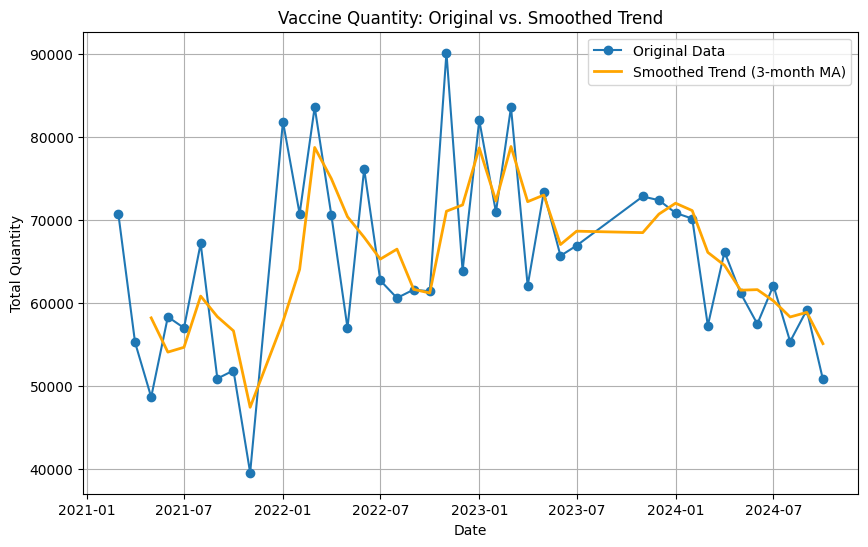

In [ ]:
# Step 2: Remove extreme outliers (e.g., rate of change beyond -20% to 20%)
monthly_data['rate_of_change'] = monthly_data['y'].pct_change() * 100
filtered_data = monthly_data[(monthly_data['rate_of_change'] >= -50) & (monthly_data['rate_of_change'] <= 50)]

# Step 3: Apply moving average to smooth the data (3-month window)
filtered_data['smoothed'] = filtered_data['y'].rolling(window=3).mean()

# Visualize the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['ds'], filtered_data['y'], label='Original Data', marker='o')
plt.plot(filtered_data['ds'], filtered_data['smoothed'], label='Smoothed Trend (3-month MA)', color='orange', linewidth=2)
plt.title('Vaccine Quantity: Original vs. Smoothed Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `sindh_ts` and `punjab_ts` are pandas Series with datetime index and vaccine data

# Select only the 'y' column (the time series data) and the 'ds' column (datetime index)
sindh_ts = filtered_data[['ds', 'y']].set_index('ds')['y']  # Use 'y' column as the time series

# Decompose the time series for Sindh
sindh_decomposed = sm.tsa.seasonal_decompose(sindh_ts, model="additive", period=12)

# Plot Sindh decomposition
plt.figure(figsize=(12, 8))
sindh_decomposed.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Decompose the time series
sindh_decomposed = sm.tsa.seasonal_decompose(sindh_ts, model="additive", period=12)

# Extract the components
trend = sindh_decomposed.trend
seasonal = sindh_decomposed.seasonal
residual = sindh_decomposed.resid

# Create an interactive graph with Plotly
fig = go.Figure()

# Add original data
fig.add_trace(go.Scatter(
    x=sindh_ts.index,
    y=sindh_ts.values,
    mode='lines',
    name='Original Data',
    line=dict(color='blue')
))

# Add trend component
fig.add_trace(go.Scatter(
    x=trend.index,
    y=trend.values,
    mode='lines',
    name='Trend',
    line=dict(color='orange')
))

# Add seasonal component
fig.add_trace(go.Scatter(
    x=seasonal.index,
    y=seasonal.values,
    mode='lines',
    name='Seasonality',
    line=dict(color='green')
))

# Add residual component
fig.add_trace(go.Scatter(
    x=residual.index,
    y=residual.values,
    mode='lines',
    name='Residual',
    line=dict(color='red')
))

# Customize layout
fig.update_layout(
    title='Time Series Decomposition (Interactive)',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_dark',  # Optional: use a dark theme
    legend=dict(title='Components', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    hovermode='x unified'
)

# Show the figure
fig.show()


<ipython-input-82-575028cb67a1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-575028cb67a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-575028cb67a1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-575028c

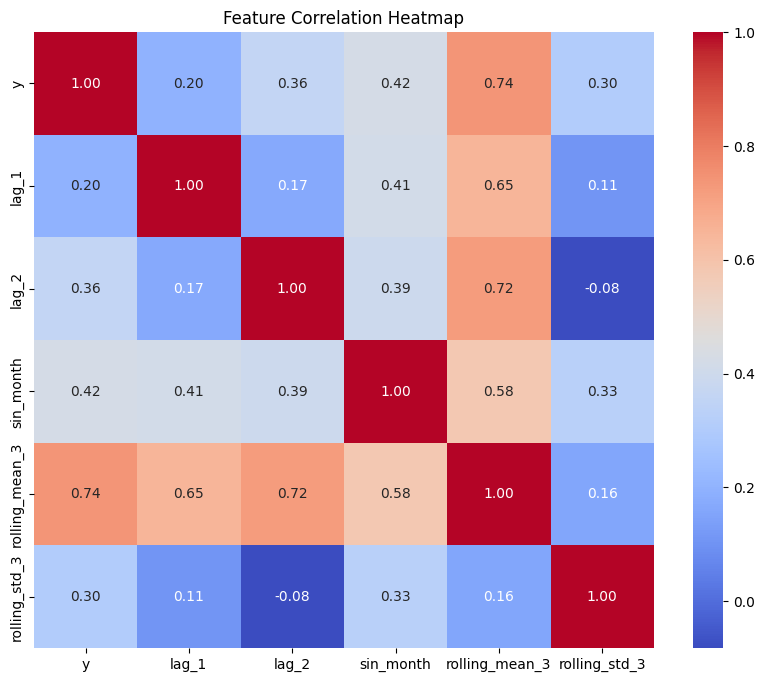

In [ ]:
# Feature Engineering: Add lag features and seasonality indicators
filtered_data['month'] = filtered_data['ds'].dt.month
filtered_data['year'] = filtered_data['ds'].dt.year
filtered_data['lag_1'] = filtered_data['y'].shift(1)  # Lagged 1 month
filtered_data['lag_2'] = filtered_data['y'].shift(2)  # Lagged 2 months
# Add sine and cosine transformations for seasonality
filtered_data['sin_month'] = np.sin(2 * np.pi * filtered_data['month'] / 12)
#filtered_data['cos_month'] = np.cos(2 * np.pi * filtered_data['month'] / 12)

# Add rolling statistics
filtered_data['rolling_mean_3'] = filtered_data['y'].rolling(window=3).mean()
filtered_data['rolling_std_3'] = filtered_data['y'].rolling(window=3).std()

# Drop missing values generated by lagging
filtered_data.dropna(inplace=True)

# Visualize the correlation between features and target variable
plt.figure(figsize=(10, 8))
corr_matrix = filtered_data[['y', 'lag_1', 'lag_2','sin_month', 'rolling_mean_3', 'rolling_std_3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
filtered_data.head()

,month_year,y,ds,rate_of_change,smoothed,month,year,lag_1,lag_2,sin_month,rolling_mean_3,rolling_std_3
4,2021-05,48630,2021-05-01,-11.945244,58187.333333,5,2021,55227.0,70705.0,5.000000e-01,58187.333333,11331.332064
5,2021-06,58311,2021-06-01,19.907465,54056.000000,6,2021,48630.0,55227.0,1.224647e-16,54056.000000,4945.591067
6,2021-07,56971,2021-07-01,-2.298023,54637.333333,7,2021,58311.0,48630.0,-5.000000e-01,54637.333333,5245.468552
7,2021-08,67163,2021-08-01,17.889804,60815.000000,8,2021,56971.0,58311.0,-8.660254e-01,60815.000000,5538.206208
8,2021-09,50862,2021-09-01,-24.270804,58332.000000,9,2021,67163.0,56971.0,-1.000000e+00,58332.000000,8235.283298


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import mean_squared_error


train_size = int(len(filtered_data) * 0.8)
train_data = filtered_data[:train_size]
test_data = filtered_data[train_size:]

# Prepare the data for Prophet (Prophet expects a 'ds' and 'y' column)
train= train_data[['ds', 'y']]
test = test_data[['ds', 'y']]


# Create a Prophet model with more flexibility and seasonality adjustments
model = Prophet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Enable weekly seasonality
    daily_seasonality=False, # Disable daily seasonality (if irrelevant)
    changepoint_prior_scale=0.5,  # Adjust for more flexibility
    seasonality_prior_scale=10,  # Stronger adherence to seasonal trends
    holidays_prior_scale=10,    # Adjust holidays if needed
)

# Fit the model to the data
model.fit(train[['ds', 'y']])

# Generate future dates for prediction
future = pd.DataFrame({'ds': pd.date_range(start=train_data['ds'].min(),
                                            end=test_data['ds'].max(),
                                            freq='MS')})  # Use 'MS' for month start frequency

# Make predictions
forecast = model.predict(future)

# Evaluate performance on the test set
# Ensuring 'ds' columns are in the same format
test['ds'] = test['ds'].astype(forecast['ds'].dtype)

comparison = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat'])) # Now mean_squared_error is defined
mape = (abs(comparison['y'] - comparison['yhat']) / comparison['y']) * 100
mean_mape = mape.mean()


INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/amym_qz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/s1663q2i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35600', 'data', 'file=/tmp/tmpu85l_er6/amym_qz8.json', 'init=/tmp/tmpu85l_er6/s1663q2i.json', 'output', 'file=/tmp/tmpu85l_er6/prophet_modelsmxr23op/prophet_model-20241231101527.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-84-26d024a03cdb>:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [ ]:
future

,ds
0,2021-05-01
1,2021-06-01
2,2021-07-01
3,2021-08-01
4,2021-09-01
5,2021-10-01
6,2021-11-01
7,2021-12-01
8,2022-01-01
9,2022-02-01


In [ ]:
# Output the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mean_mape}%")

MAE: 22341.266261561475
RMSE: 26608.85656316655
MAPE: 38.56944877912943%


In [ ]:
forecast_2025= forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

#print(forecast_2025)


In [ ]:
import pandas as pd
import plotly.express as px

# Example total vaccine quantity for Sindh in 2023 (replace this with your actual value)
total_vaccine_quantity = 885542  # Example value

# Dataset with age groups and population
data = {
    "Age Group": ["Age 0-2", "Age 3-18+", "Age 19-65+"],
    "Population": [5068369, 36821254, 13706524],  # Population for each group in Sindh
    "Vaccine_Percentage": [75, 15, 10]  # Vaccine distribution percentages
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the vaccine quantity for each group
df["Vaccine_Quantity"] = (total_vaccine_quantity * (df["Vaccine_Percentage"] / 100)).round()

# Create an interactive bar graph
fig = px.bar(
    df,
    x="Age Group",
    y="Vaccine_Quantity",
    title=f"PCV Vaccine Distribution in Sindh (2023, Total Vaccines: {total_vaccine_quantity:,})",
    labels={"Vaccine_Quantity": "Vaccine Quantity (Doses)", "Age Group": "Age Groups"},
    color="Age Group",  # Optional: Color-code by age group
    text="Vaccine_Quantity"
)

# Customize the graph
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')  # Show exact vaccine quantity on the bars
fig.update_layout(
    xaxis_title="Age Groups",
    yaxis_title="Vaccine Quantity (Doses)",
    showlegend=False
)

# Show the graph
fig.show()

In [ ]:
# Filter the forecast for the specific period (Dec 2024 - Nov 2025)
forecast_period = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2025-11-30')]

# Calculate the total quantity required for that period
total_quantity_required = forecast_period['yhat'].sum()

print(f"Total vaccine quantity required from Dec 2024 to Nov 2025: {total_quantity_required}")

Total vaccine quantity required from Dec 2024 to Nov 2025: 705489.7604297108


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Current population of Sindh in 2023
current_population = 55696147

# Annual growth rate (percentage)
growth_rate = 2.4 / 100  # Convert percentage to decimal

# Calculate the population for November 2024 to November 2025
current_date = datetime(2024, 12, 1)
future_date = datetime(2025, 11, 1)
time_difference_years = (future_date - current_date).days / 365.25  # Convert days to years

# Population growth formula
expected_population = current_population * (1 + growth_rate) ** time_difference_years

# Store the data in a DataFrame
data = {
    "Year": ["2024 December", "2025 November"],
    "Population": [current_population, round(expected_population)]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

            Year  Population
0  2024 December    55696147
1  2025 November    56920940


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

# Current population of Sindh in 2023
current_population = 55696147

# Annual growth rate (percentage)
growth_rate = 2.4 / 100  # Convert percentage to decimal

# Calculate the population for November 2024 to November 2025
current_date = datetime(2024, 12, 1)
future_date = datetime(2025, 11, 1)
time_difference_years = (future_date - current_date).days / 365.25  # Convert days to years

# Population growth formula
expected_population = current_population * (1 + growth_rate) ** time_difference_years

# Store the data in a DataFrame
population_data = {
    "Year": ["2024 December", "2025 November"],
    "Population": [current_population, round(expected_population)]
}
population_df = pd.DataFrame(population_data)

# Example total vaccine quantity for Sindh in 2023 (replace this with your actual value)
total_vaccine_quantity = 705489.7604297108

# Dataset with age groups and population proportions
vaccine_data = {
    "Age Group": ["Age 0-2", "Age 3-18", "Age 19-65+"],
    "Population": [5068369, 36821254, 13706524],  # Population for each group in Sindh
    "Vaccine_Percentage": [75, 15, 10]  # Vaccine distribution percentages
}

# Create a DataFrame for vaccine distribution
vaccine_df = pd.DataFrame(vaccine_data)

# Adjust vaccine quantities based on expected population growth
growth_factor = expected_population / current_population
vaccine_df["Adjusted_Population"] = (vaccine_df["Population"] * growth_factor).round()
vaccine_df["Adjusted_Vaccine_Quantity"] = (total_vaccine_quantity * (vaccine_df["Vaccine_Percentage"] / 100)).round()

# Create an interactive bar graph
fig = px.bar(
    vaccine_df,
    x="Age Group",
    y="Adjusted_Vaccine_Quantity",
    title=f"PCV Vaccine Distribution in Sindh (2025, Total Vaccines: {total_vaccine_quantity:,})",
    labels={"Adjusted_Vaccine_Quantity": "Vaccine Quantity (Doses)", "Age Group": "Age Groups"},
    color="Age Group",  # Optional: Color-code by age group
    text="Adjusted_Vaccine_Quantity"
)

# Customize the graph
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')  # Show exact vaccine quantity on the bars
fig.update_layout(
    xaxis_title="Age Groups",
    yaxis_title="Adjusted Vaccine Quantity (Doses)",
    showlegend=False
)

# Show the graph
fig.show()

# Display population projections
#print(population_df)


## Punjab data

In [ ]:
import plotly.express as px
# Extract the year from the 'ds' column and create a new 'year' column
data_p['year'] = data_p['ds'].dt.year

# Group by year and sum the total quantities
total_quantity_per_year = data_p.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(total_quantity_per_year,
             x='year',
             y='y',
             title='Total Vaccine Quantity Distributed per Year Sindh',
             labels={'year': 'Year', 'y': 'Total Quantity'},
             color='year',  # Color bars by year
             text='y'  # Display total quantity on top of each bar
            )

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error # Import mean_squared_error

In [ ]:
# Concatenate the data_s and data_p datasets into one
#data = pd.concat([filtered_data_s, filtered_data_p])
data= data_p
# Ensure 'ds' is in datetime format for both datasets
data['ds'] = pd.to_datetime(data['ds'])

# Sort the data chronologically
data = data.sort_values(by='ds')

# Make sure 'y' is numeric (vaccine quantities)
data['y'] = pd.to_numeric(data['y'], errors='coerce')  # Convert non-numeric to NaN

# Step 2: Calculate the rate of change (percentage) in vaccine quantity
#data['rate_of_change'] = data['y'].pct_change() * 100


# Extract the year from the 'ds' column and create a new 'year' column
data['year'] = data['ds'].dt.year

# Filter data to exclude the year 2020
filtered_data = data[data['year']> 2020]

# Group by year and sum the total quantities
total_quantity_per_year = filtered_data.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(
    total_quantity_per_year,
    x='year',
    y='y',
    title='Total Vaccine Quantity Distributed per Year)',
    labels={'year': 'Year', 'y': 'Total Quantity'},
    color='year',  # Color bars by year
    text='y'  # Display total quantity on top of each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()
data = filtered_data

In [ ]:
# Assuming 'data' is your DataFrame with 'ds' (date) and 'y' (vaccine quantities)

# Step 1: Ensure the 'ds' column is in datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
data_monthly = data.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()

# Step 3: Apply a 3-month moving average for smoothing
data_monthly['smoothed'] = data_monthly['y'].rolling(window=3).mean()

# Step 4: Create an interactive plot using Plotly
fig = go.Figure()

# Add original data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['y'],
        mode='lines+markers',
        name='Original Data',
        line=dict(color='blue'),
        marker=dict(size=6)
    )
)

# Add smoothed data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['smoothed'],
        mode='lines',
        name='Smoothed Trend (2-month MA)',
        line=dict(color='orange', width=3)
    )
)

# Customize the layout
fig.update_layout(
    title='Interactive Graph: Original vs. Smoothed Trend (2-month Moving Average)',
    xaxis_title='Date',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: Dark theme
    legend=dict(title='Legend', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show the figure
fig.show()

<ipython-input-95-d5b701ff3d47>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<ipython-input-96-91ed7733454f>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-91ed7733454f>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



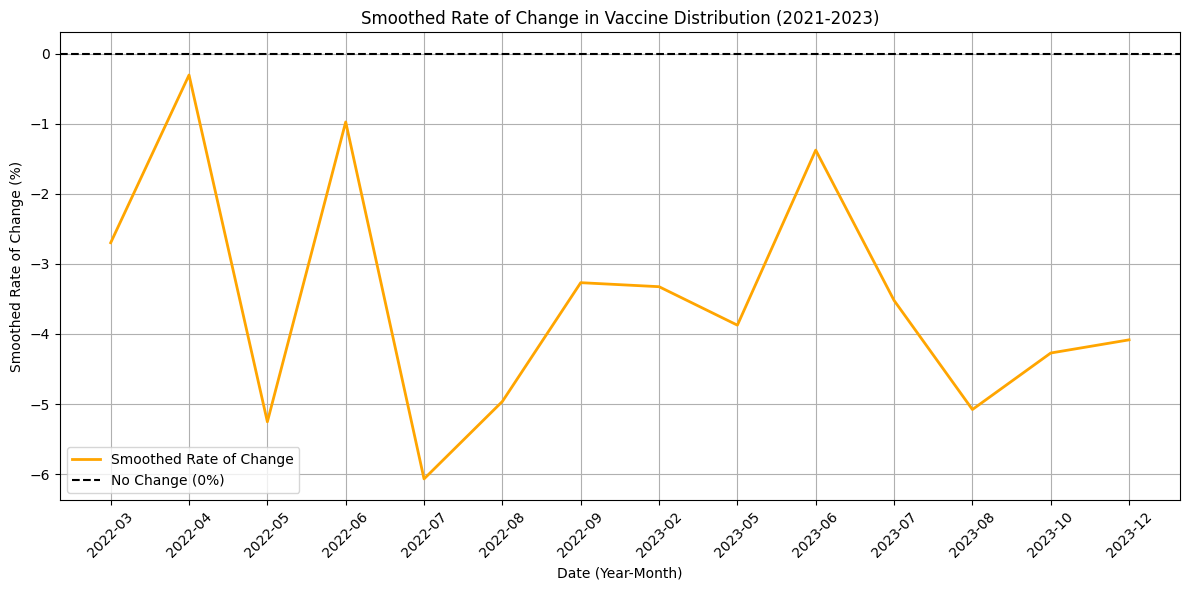

In [ ]:
# Step 1: Convert the 'ds' column to datetime format if not already done
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Create a new column for the year and month (combining them) or just for month
data['year_month'] = data['ds'].dt.to_period('M')  # This will create a 'year-month' period

# Step 3: Group by year_month and sum the 'y' (total_quantity) values
grouped_data = data.groupby('year_month')['y'].sum().reset_index()

# Step 4: Calculate the rate of change
grouped_data['rate_of_change'] = grouped_data['y'].pct_change() * 100

# Step 5: Filter extreme rate of change values
filtered_grouped_data = grouped_data[(grouped_data['rate_of_change'] >= -20) & (grouped_data['rate_of_change'] <= 20)]

# Step 6: Apply a smoothing function (moving average) to the rate_of_change column
filtered_grouped_data['smoothed_rate_of_change'] = filtered_grouped_data['rate_of_change'].rolling(window=5).mean()

# Step 7: Zoom in on a specific time period (optional)
filtered_grouped_data_zoomed = filtered_grouped_data[(filtered_grouped_data['year_month'] >= '2021-01') & (filtered_grouped_data['year_month'] <= '2023-12')]

# Now continue with the original code from cell ipython-input-15-b7cedd9c5031:
filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()

# Step 8: Plot the smoothed rate of change over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_grouped_data_zoomed['year_month'].astype(str), filtered_grouped_data_zoomed['smoothed_rate_of_change'], label='Smoothed Rate of Change', color='orange', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', label='No Change (0%)')
plt.title('Smoothed Rate of Change in Vaccine Distribution (2021-2023)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Smoothed Rate of Change (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Filter the dataset to select specific data
# Assuming the 'transaction_month' column is in datetime format and 'total_quantity' column holds the quantity
# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
# Exclude the 'year_month' column from the aggregation
data = data.groupby(pd.Grouper(key='ds', freq='M'))[['y']].sum().reset_index()
# Filter data based on transaction month and total quantity
# Example: Filter data from 2021 onwards, and only for rows where total_quantity is above a certain threshold
filtered_data = data[(data['ds'] >= '2020-01-01') & (data['y'] > 100)].copy()  # Use .copy() to avoid warnings
filtered_data.head()
# Step 2: Calculate the Rate of Change (Percentage) for the filtered data
filtered_data['rate_of_change'] = filtered_data['y'].pct_change() * 100

# Step 3: Identify maximum and minimum growth periods
max_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmax()]
min_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmin()]

# Step 4: Create subplots (3 plots: Rate of Change, Maximum Growth, Minimum Growth)
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,  # Share x-axis across all plots
    vertical_spacing=0.1,  # Adjust space between plots
    subplot_titles=("Rate of Change", "Maximum Growth Period", "Minimum Growth Period")
)

# Step 5: Plot the Rate of Change for the filtered data
fig.add_trace(
    go.Scatter(
        x=filtered_data['ds'],
        y=filtered_data['rate_of_change'],
        mode='lines+markers',
        name='Rate of Change',
        line=dict(color='purple', width=2)
    ),
    row=1, col=1  # Add to first subplot
)

# Step 6: Plot Maximum Growth Period (highlighted with a red star)
fig.add_trace(
    go.Scatter(
        x=[max_growth_period['ds']],
        y=[max_growth_period['rate_of_change']],
        mode='markers',
        name='Max Growth Period',
        marker=dict(color='red', size=10, symbol='star')
    ),
    row=2, col=1  # Add to second subplot
)

# Step 7: Plot Minimum Growth Period (highlighted with a green star)
fig.add_trace(
    go.Scatter(
        x=[min_growth_period['ds']],
        y=[min_growth_period['rate_of_change']],
        mode='markers',
        name='Min Growth Period',
        marker=dict(color='green', size=10, symbol='star')
    ),
    row=3, col=1  # Add to third subplot
)

# Step 8: Customize layout
fig.update_layout(
    title='Rate of Change, Maximum Growth, and Minimum Growth Periods for Filtered Data',
    template='plotly_dark',  # Optional: Dark theme
    showlegend=True,  # Show legend
)

# Step 9: Show the figure
fig.show()

<ipython-input-97-f700c5df096d>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Find peaks (maximum rate of change) and dips (minimum rate of change)
max_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmax()]
min_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmin()]

# Access the 'year_month' index instead of 'ds' for the date
print(f"Max Growth Period: {max_growth_period.name} with Rate of Change: {max_growth_period['smoothed_rate_of_change']}")
print(f"Min Growth Period: {min_growth_period.name} with Rate of Change: {min_growth_period['smoothed_rate_of_change']}")

filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()

Max Growth Period: 15 with Rate of Change: -0.3057115604788911
Min Growth Period: 18 with Rate of Change: -6.068540221462299


<ipython-input-98-8acfbf5b4435>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-99-d98360d024a6>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-99-d98360d024a6>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-99-d98360d024a6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

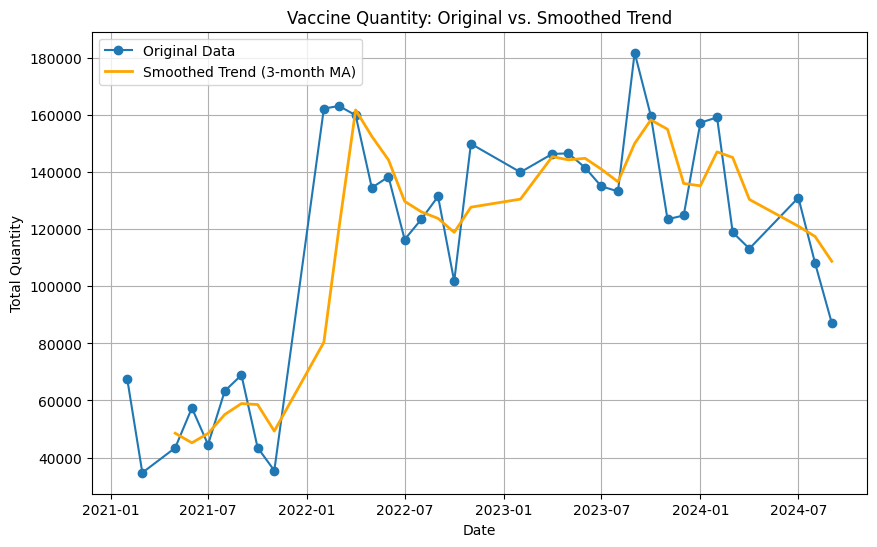

In [ ]:
# Concatenate Sindh and Punjab data
#data = pd.concat([data_s[['ds', 'y']], data_p[['ds', 'y']]])
filtered_data=data
data = pd.concat([data[['ds', 'y']]])# data[['ds', 'y']]])
# Handle missing values (fill with interpolation or forward fill)
data['y'].fillna(method='ffill', inplace=True)

# Step 1: Group by Year and Month to remove repeated months
data['month_year'] = data['ds'].dt.to_period('M')

# Aggregate the data by summing the vaccine quantities for each month
monthly_data = data.groupby('month_year').agg({'y': 'sum'}).reset_index()

# Convert 'month_year' back to datetime
monthly_data['ds'] = monthly_data['month_year'].dt.to_timestamp()
# Step 2: Remove extreme outliers (e.g., rate of change beyond -20% to 20%)
monthly_data['rate_of_change'] = monthly_data['y'].pct_change() * 100
filtered_data = monthly_data[(monthly_data['rate_of_change'] >= -50) & (monthly_data['rate_of_change'] <= 50)]

# Step 3: Apply moving average to smooth the data (3-month window)
filtered_data['smoothed'] = filtered_data['y'].rolling(window=3).mean()

# Visualize the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['ds'], filtered_data['y'], label='Original Data', marker='o')
plt.plot(filtered_data['ds'], filtered_data['smoothed'], label='Smoothed Trend (3-month MA)', color='orange', linewidth=2)
plt.title('Vaccine Quantity: Original vs. Smoothed Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `sindh_ts` and `punjab_ts` are pandas Series with datetime index and vaccine data

# Select only the 'y' column (the time series data) and the 'ds' column (datetime index)
sindh_ts = filtered_data[['ds', 'y']].set_index('ds')['y']  # Use 'y' column as the time series

# Decompose the time series for Sindh
sindh_decomposed = sm.tsa.seasonal_decompose(sindh_ts, model="additive", period=12)

# Plot Sindh decomposition
plt.figure(figsize=(12, 8))
sindh_decomposed.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-101-575028cb67a1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-575028cb67a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-575028cb67a1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-101-575

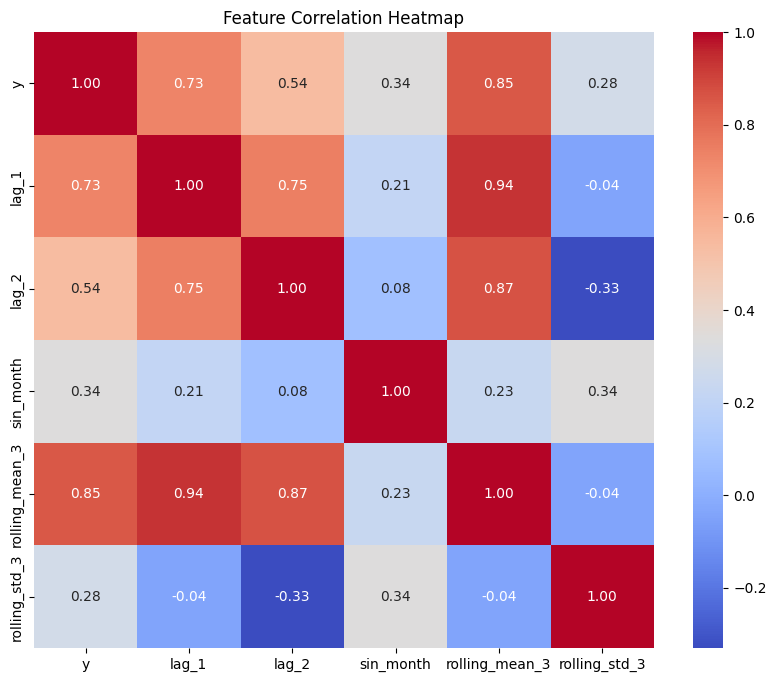

In [ ]:
# Feature Engineering: Add lag features and seasonality indicators
filtered_data['month'] = filtered_data['ds'].dt.month
filtered_data['year'] = filtered_data['ds'].dt.year
filtered_data['lag_1'] = filtered_data['y'].shift(1)  # Lagged 1 month
filtered_data['lag_2'] = filtered_data['y'].shift(2)  # Lagged 2 months
# Add sine and cosine transformations for seasonality
filtered_data['sin_month'] = np.sin(2 * np.pi * filtered_data['month'] / 12)
#filtered_data['cos_month'] = np.cos(2 * np.pi * filtered_data['month'] / 12)

# Add rolling statistics
filtered_data['rolling_mean_3'] = filtered_data['y'].rolling(window=3).mean()
filtered_data['rolling_std_3'] = filtered_data['y'].rolling(window=3).std()

# Drop missing values generated by lagging
filtered_data.dropna(inplace=True)

# Visualize the correlation between features and target variable
plt.figure(figsize=(10, 8))
corr_matrix = filtered_data[['y', 'lag_1', 'lag_2','sin_month', 'rolling_mean_3', 'rolling_std_3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
train_size = int(len(filtered_data) * 0.8)
train_data = filtered_data[:train_size]
test_data = filtered_data[train_size:]

# Prepare the data for Prophet (Prophet expects a 'ds' and 'y' column)
train= train_data[['ds', 'y']]
test = test_data[['ds', 'y']]


# Create a Prophet model with more flexibility and seasonality adjustments
model = Prophet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Enable weekly seasonality
    daily_seasonality=False, # Disable daily seasonality (if irrelevant)
    changepoint_prior_scale=0.5,  # Adjust for more flexibility
    seasonality_prior_scale=10,  # Stronger adherence to seasonal trends
    holidays_prior_scale=10,    # Adjust holidays if needed
)

# Fit the model to the data
model.fit(train[['ds', 'y']])

# Generate future dates for prediction
future = pd.DataFrame({'ds': pd.date_range(start=train_data['ds'].min(),
                                            end=test_data['ds'].max(),
                                            freq='MS')})  # Use 'MS' for month start frequency

# Make predictions
forecast = model.predict(future)

# Evaluate performance on the test set
# Ensuring 'ds' columns are in the same format
test['ds'] = test['ds'].astype(forecast['ds'].dtype)

comparison = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat'])) # Now mean_squared_error is defined
mape = (abs(comparison['y'] - comparison['yhat']) / comparison['y']) * 100
mean_mape = mape.mean()

# Output the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mean_mape}%")

forecast_2025= forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

# Filter the forecast for the specific period (Dec 2024 - Nov 2025)
forecast_period = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2025-11-30')]

# Calculate the total quantity required for that period
total_quantity_required = forecast_period['yhat'].sum()

print(f"Total vaccine quantity required from Dec 2024 to Nov 2025: {total_quantity_required}")

INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/ep1h0qau.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/qf4fn51p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8053', 'data', 'file=/tmp/tmpu85l_er6/ep1h0qau.json', 'init=/tmp/tmpu85l_er6/qf4fn51p.json', 'output', 'file=/tmp/tmpu85l_er6/prophet_modelz9u7lr29/prophet_model-20241231101531.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:15:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 125941.93369391405
RMSE: 172868.2775896788
MAPE: 95.80711983338556%
Total vaccine quantity required from Dec 2024 to Nov 2025: 935999.7999549797


<ipython-input-102-08fc5c390b48>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Combined Dataset

In [ ]:
# Concatenate the data_s and data_p datasets into one
data = pd.concat([filtered_data_s, filtered_data_p])

# Ensure 'ds' is in datetime format for both datasets
data['ds'] = pd.to_datetime(data['ds'])

# Sort the data chronologically
data = data.sort_values(by='ds')

# Make sure 'y' is numeric (vaccine quantities)
data['y'] = pd.to_numeric(data['y'], errors='coerce')  # Convert non-numeric to NaN

# Step 2: Calculate the rate of change (percentage) in vaccine quantity
#data['rate_of_change'] = data['y'].pct_change() * 100


# Extract the year from the 'ds' column and create a new 'year' column
data['year'] = data['ds'].dt.year

# Filter data to exclude the year 2020
filtered_data = data[data['year']> 2020]

# Group by year and sum the total quantities
total_quantity_per_year = filtered_data.groupby('year')['y'].sum().reset_index()

# Create an interactive bar chart using Plotly
fig = px.bar(
    total_quantity_per_year,
    x='year',
    y='y',
    title='Total Vaccine Quantity Distributed per Year)',
    labels={'year': 'Year', 'y': 'Total Quantity'},
    color='year',  # Color bars by year
    text='y'  # Display total quantity on top of each bar
)

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: change the theme to dark for better visuals
    showlegend=False  # Remove legend as it's not needed for this chart
)

# Show the figure
fig.show()
data = filtered_data

In [ ]:
# Assuming 'data' is your DataFrame with 'ds' (date) and 'y' (vaccine quantities)

# Step 1: Ensure the 'ds' column is in datetime format
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
data_monthly = data.groupby(pd.Grouper(key='ds', freq='M')).sum().reset_index()

# Step 3: Apply a 3-month moving average for smoothing
data_monthly['smoothed'] = data_monthly['y'].rolling(window=3).mean()

# Step 4: Create an interactive plot using Plotly
fig = go.Figure()

# Add original data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['y'],
        mode='lines+markers',
        name='Original Data',
        line=dict(color='blue'),
        marker=dict(size=6)
    )
)

# Add smoothed data trace
fig.add_trace(
    go.Scatter(
        x=data_monthly['ds'],
        y=data_monthly['smoothed'],
        mode='lines',
        name='Smoothed Trend (2-month MA)',
        line=dict(color='orange', width=3)
    )
)

# Customize the layout
fig.update_layout(
    title='Interactive Graph: Original vs. Smoothed Trend (2-month Moving Average)',
    xaxis_title='Date',
    yaxis_title='Total Quantity',
    template='plotly_dark',  # Optional: Dark theme
    legend=dict(title='Legend', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

# Show the figure
fig.show()

<ipython-input-104-d5b701ff3d47>:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<ipython-input-105-91ed7733454f>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-105-91ed7733454f>:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



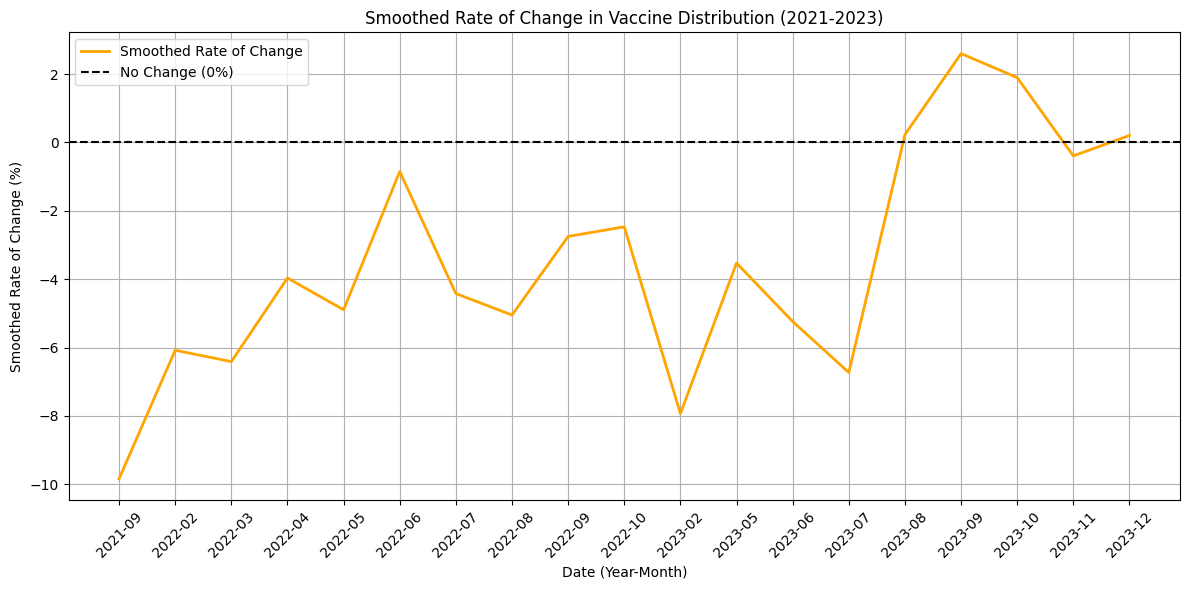

In [ ]:
# Step 1: Convert the 'ds' column to datetime format if not already done
data['ds'] = pd.to_datetime(data['ds'])

# Step 2: Create a new column for the year and month (combining them) or just for month
data['year_month'] = data['ds'].dt.to_period('M')  # This will create a 'year-month' period

# Step 3: Group by year_month and sum the 'y' (total_quantity) values
grouped_data = data.groupby('year_month')['y'].sum().reset_index()

# Step 4: Calculate the rate of change
grouped_data['rate_of_change'] = grouped_data['y'].pct_change() * 100

# Step 5: Filter extreme rate of change values
filtered_grouped_data = grouped_data[(grouped_data['rate_of_change'] >= -20) & (grouped_data['rate_of_change'] <= 20)]

# Step 6: Apply a smoothing function (moving average) to the rate_of_change column
filtered_grouped_data['smoothed_rate_of_change'] = filtered_grouped_data['rate_of_change'].rolling(window=5).mean()

# Step 7: Zoom in on a specific time period (optional)
filtered_grouped_data_zoomed = filtered_grouped_data[(filtered_grouped_data['year_month'] >= '2021-01') & (filtered_grouped_data['year_month'] <= '2023-12')]

# Now continue with the original code from cell ipython-input-15-b7cedd9c5031:
filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()

# Step 8: Plot the smoothed rate of change over time
plt.figure(figsize=(12, 6))
plt.plot(filtered_grouped_data_zoomed['year_month'].astype(str), filtered_grouped_data_zoomed['smoothed_rate_of_change'], label='Smoothed Rate of Change', color='orange', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', label='No Change (0%)')
plt.title('Smoothed Rate of Change in Vaccine Distribution (2021-2023)')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Smoothed Rate of Change (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Filter the dataset to select specific data
# Assuming the 'transaction_month' column is in datetime format and 'total_quantity' column holds the quantity
# Step 2: Group by month (if the data is not already monthly) and aggregate by sum
# Exclude the 'year_month' column from the aggregation
data = data.groupby(pd.Grouper(key='ds', freq='M'))[['y']].sum().reset_index()
# Filter data based on transaction month and total quantity
# Example: Filter data from 2021 onwards, and only for rows where total_quantity is above a certain threshold
filtered_data = data[(data['ds'] >= '2020-01-01') & (data['y'] > 100)].copy()  # Use .copy() to avoid warnings
filtered_data.head()
# Step 2: Calculate the Rate of Change (Percentage) for the filtered data
filtered_data['rate_of_change'] = filtered_data['y'].pct_change() * 100

# Step 3: Identify maximum and minimum growth periods
max_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmax()]
min_growth_period = filtered_data.loc[filtered_data['rate_of_change'].idxmin()]

# Step 4: Create subplots (3 plots: Rate of Change, Maximum Growth, Minimum Growth)
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,  # Share x-axis across all plots
    vertical_spacing=0.1,  # Adjust space between plots
    subplot_titles=("Rate of Change", "Maximum Growth Period", "Minimum Growth Period")
)

# Step 5: Plot the Rate of Change for the filtered data
fig.add_trace(
    go.Scatter(
        x=filtered_data['ds'],
        y=filtered_data['rate_of_change'],
        mode='lines+markers',
        name='Rate of Change',
        line=dict(color='purple', width=2)
    ),
    row=1, col=1  # Add to first subplot
)

# Step 6: Plot Maximum Growth Period (highlighted with a red star)
fig.add_trace(
    go.Scatter(
        x=[max_growth_period['ds']],
        y=[max_growth_period['rate_of_change']],
        mode='markers',
        name='Max Growth Period',
        marker=dict(color='red', size=10, symbol='star')
    ),
    row=2, col=1  # Add to second subplot
)

# Step 7: Plot Minimum Growth Period (highlighted with a green star)
fig.add_trace(
    go.Scatter(
        x=[min_growth_period['ds']],
        y=[min_growth_period['rate_of_change']],
        mode='markers',
        name='Min Growth Period',
        marker=dict(color='green', size=10, symbol='star')
    ),
    row=3, col=1  # Add to third subplot
)

# Step 8: Customize layout
fig.update_layout(
    title='Rate of Change, Maximum Growth, and Minimum Growth Periods for Filtered Data',
    template='plotly_dark',  # Optional: Dark theme
    showlegend=True,  # Show legend
)

# Step 9: Show the figure
fig.show()

<ipython-input-106-f700c5df096d>:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Find peaks (maximum rate of change) and dips (minimum rate of change)
max_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmax()]
min_growth_period = filtered_grouped_data_zoomed.loc[filtered_grouped_data_zoomed['smoothed_rate_of_change'].idxmin()]

# Access the 'year_month' index instead of 'ds' for the date
print(f"Max Growth Period: {max_growth_period.name} with Rate of Change: {max_growth_period['smoothed_rate_of_change']}")
print(f"Min Growth Period: {min_growth_period.name} with Rate of Change: {min_growth_period['smoothed_rate_of_change']}")

filtered_data_zoomed = filtered_grouped_data_zoomed.dropna(subset=['smoothed_rate_of_change'])
filtered_data_zoomed['smoothed_rate_of_change'] = filtered_data_zoomed['smoothed_rate_of_change'].interpolate()

Max Growth Period: 32 with Rate of Change: 2.6002018304404997
Min Growth Period: 8 with Rate of Change: -9.84010945520198


<ipython-input-107-8acfbf5b4435>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-108-d98360d024a6>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-108-d98360d024a6>:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-108-d98360d024a6>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

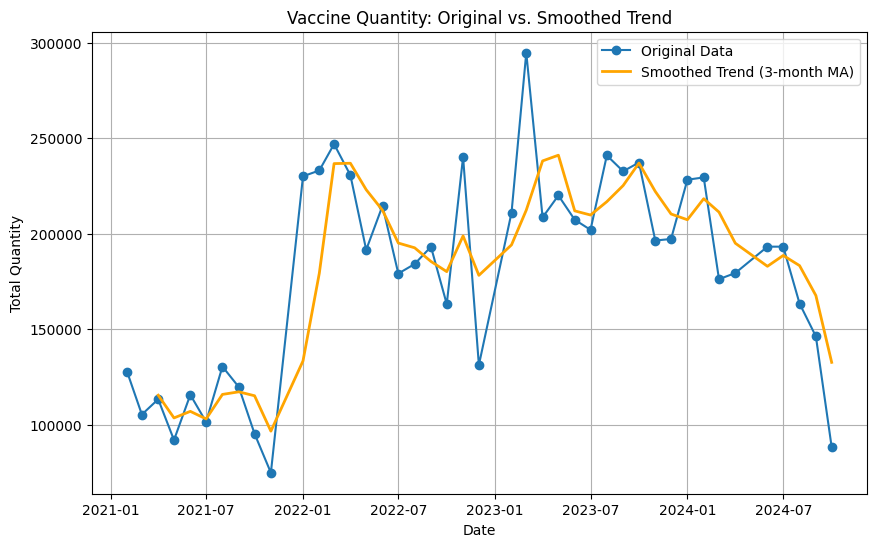

In [ ]:
# Concatenate Sindh and Punjab data
#data = pd.concat([data_s[['ds', 'y']], data_p[['ds', 'y']]])
filtered_data=data
data = pd.concat([data[['ds', 'y']]])# data[['ds', 'y']]])
# Handle missing values (fill with interpolation or forward fill)
data['y'].fillna(method='ffill', inplace=True)

# Step 1: Group by Year and Month to remove repeated months
data['month_year'] = data['ds'].dt.to_period('M')

# Aggregate the data by summing the vaccine quantities for each month
monthly_data = data.groupby('month_year').agg({'y': 'sum'}).reset_index()

# Convert 'month_year' back to datetime
monthly_data['ds'] = monthly_data['month_year'].dt.to_timestamp()
# Step 2: Remove extreme outliers (e.g., rate of change beyond -20% to 20%)
monthly_data['rate_of_change'] = monthly_data['y'].pct_change() * 100
filtered_data = monthly_data[(monthly_data['rate_of_change'] >= -50) & (monthly_data['rate_of_change'] <= 50)]

# Step 3: Apply moving average to smooth the data (3-month window)
filtered_data['smoothed'] = filtered_data['y'].rolling(window=3).mean()

# Visualize the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['ds'], filtered_data['y'], label='Original Data', marker='o')
plt.plot(filtered_data['ds'], filtered_data['smoothed'], label='Smoothed Trend (3-month MA)', color='orange', linewidth=2)
plt.title('Vaccine Quantity: Original vs. Smoothed Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

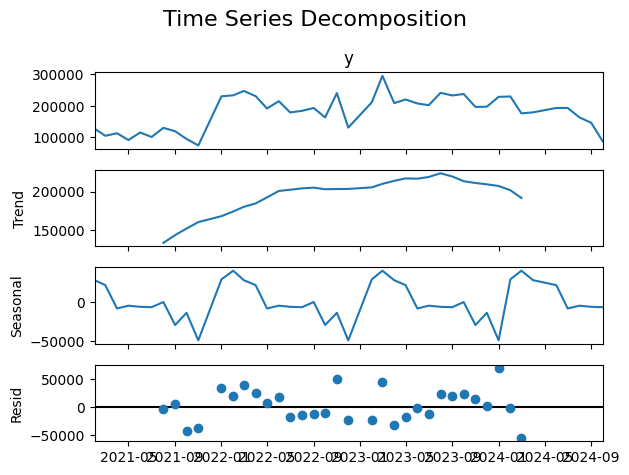

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `sindh_ts` and `punjab_ts` are pandas Series with datetime index and vaccine data

# Select only the 'y' column (the time series data) and the 'ds' column (datetime index)
sindh_ts = filtered_data[['ds', 'y']].set_index('ds')['y']  # Use 'y' column as the time series

# Decompose the time series for Sindh
sindh_decomposed = sm.tsa.seasonal_decompose(sindh_ts, model="additive", period=12)

# Plot Sindh decomposition
plt.figure(figsize=(12, 8))
sindh_decomposed.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-110-575028cb67a1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-575028cb67a1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-575028cb67a1>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-575

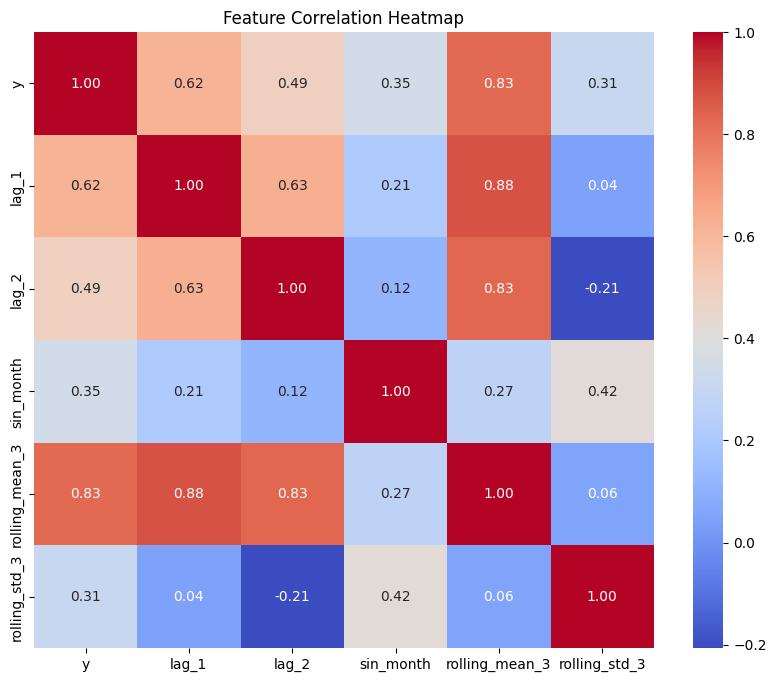

In [ ]:
# Feature Engineering: Add lag features and seasonality indicators
filtered_data['month'] = filtered_data['ds'].dt.month
filtered_data['year'] = filtered_data['ds'].dt.year
filtered_data['lag_1'] = filtered_data['y'].shift(1)  # Lagged 1 month
filtered_data['lag_2'] = filtered_data['y'].shift(2)  # Lagged 2 months
# Add sine and cosine transformations for seasonality
filtered_data['sin_month'] = np.sin(2 * np.pi * filtered_data['month'] / 12)
#filtered_data['cos_month'] = np.cos(2 * np.pi * filtered_data['month'] / 12)

# Add rolling statistics
filtered_data['rolling_mean_3'] = filtered_data['y'].rolling(window=3).mean()
filtered_data['rolling_std_3'] = filtered_data['y'].rolling(window=3).std()

# Drop missing values generated by lagging
filtered_data.dropna(inplace=True)

# Visualize the correlation between features and target variable
plt.figure(figsize=(10, 8))
corr_matrix = filtered_data[['y', 'lag_1', 'lag_2','sin_month', 'rolling_mean_3', 'rolling_std_3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd

# Example dataset with region and population
data = {
    "Region": ["Pakistan"],
    "Population": [241490000]  # 2023 population of Pakistan
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add provided information as features
df["BirthRate_per_1000"] = 26  # Birth rate per 1,000 population
df["TotalFertilityRate"] = 3.32  # Children per woman

# Updated percentage estimates of different age groups
age_group_percentages = {
    "Age_0_2_Percentage": 9.1,    # Estimated percentage of children aged 0–2
    "Age_3_14_Percentage": 31.2,  # Calculated percentage for ages 3–14
    "Age_15_64_Percentage": 56.0, # Percentage of people aged 15–64
    "Age_65_Plus_Percentage": 3.7 # Percentage of people aged 65+
}

# Add features for age group breakdown
for age_group, percentage in age_group_percentages.items():
    df[age_group] = percentage

# Calculate the absolute population for each age group
for age_group, percentage in age_group_percentages.items():
    df[f"{age_group}_Population"] = (df["Population"] * (percentage / 100)).round()

# Vaccine usage percentages for different age groups
vaccine_usage_percentages = {
    "Age_0_2": 75,  # 75% vaccines used for age 0-2
    "Age_3_18": 15, # 15% vaccines used for age 3-18
    "Age_19_65_Plus": 10  # 10% vaccines used for age 19-65+
}

# Calculate vaccines required for each age group
df["Vaccines_Age_0_2"] = (df["Age_0_2_Percentage"] * df["Population"] * (vaccine_usage_percentages["Age_0_2"] / 100) / 100).round()
df["Vaccines_Age_3_18"] = ((df["Age_3_14_Percentage"] + (5 / 56) * df["Age_15_64_Percentage"]) * df["Population"] * (vaccine_usage_percentages["Age_3_18"] / 100) / 100).round()
df["Vaccines_Age_19_65_Plus"] = ((df["Age_15_64_Percentage"] - (5 / 56) * df["Age_15_64_Percentage"] + df["Age_65_Plus_Percentage"]) * df["Population"] * (vaccine_usage_percentages["Age_19_65_Plus"] / 100) / 100).round()

# Display the updated dataset
print(df)


     Region  Population  BirthRate_per_1000  TotalFertilityRate  \
0  Pakistan   241490000                  26                3.32   

   Age_0_2_Percentage  Age_3_14_Percentage  Age_15_64_Percentage  \
0                 9.1                 31.2                  56.0   

   Age_65_Plus_Percentage  Age_0_2_Percentage_Population  \
0                     3.7                     21975590.0   

   Age_3_14_Percentage_Population  Age_15_64_Percentage_Population  \
0                      75344880.0                      135234400.0   

   Age_65_Plus_Percentage_Population  Vaccines_Age_0_2  Vaccines_Age_3_18  \
0                          8935130.0        16481692.0         13112907.0   

   Vaccines_Age_19_65_Plus  
0               13209503.0  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with region and population
data = {
    "Region": ["Pakistan"],
    "Population": [241490000]  # 2023 population of Pakistan
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add provided information as features
df["BirthRate_per_1000"] = 26  # Birth rate per 1,000 population
df["TotalFertilityRate"] = 3.32  # Children per woman

# Updated percentage estimates of different age groups
age_group_percentages = {
    "Age_0_2_Percentage": 9.1,    # Estimated percentage of children aged 0–2
    "Age_3_14_Percentage": 31.2,  # Calculated percentage for ages 3–14
    "Age_15_64_Percentage": 56.0, # Percentage of people aged 15–64
    "Age_65_Plus_Percentage": 3.7 # Percentage of people aged 65+
}

# Add features for age group breakdown
for age_group, percentage in age_group_percentages.items():
    df[age_group] = percentage

# Calculate the absolute population for each age group
for age_group, percentage in age_group_percentages.items():
    df[f"{age_group}_Population"] = (df["Population"] * (percentage / 100)).round()

# Vaccine usage percentages for different age groups
vaccine_usage_percentages = {
    "Age_0_2": 75,  # 75% vaccines used for age 0-2
    "Age_3_18": 15, # 15% vaccines used for age 3-18
    "Age_19_65_Plus": 10  # 10% vaccines used for age 19-65+
}

# Calculate vaccines required for each age group
df["Vaccines_Age_0_2"] = (df["Age_0_2_Percentage"] * df["Population"] * (vaccine_usage_percentages["Age_0_2"] / 100) / 100).round()
df["Vaccines_Age_3_18"] = ((df["Age_3_14_Percentage"] + (5 / 56) * df["Age_15_64_Percentage"]) * df["Population"] * (vaccine_usage_percentages["Age_3_18"] / 100) / 100).round()
df["Vaccines_Age_19_65_Plus"] = ((df["Age_15_64_Percentage"] - (5 / 56) * df["Age_15_64_Percentage"] + df["Age_65_Plus_Percentage"]) * df["Population"] * (vaccine_usage_percentages["Age_19_65_Plus"] / 100) / 100).round()

# Calculate the total number of vaccines required (4 vaccines per person)
df["Total_Vaccines_Age_0_2"] = df["Vaccines_Age_0_2"] * 4
df["Total_Vaccines_Age_3_18"] = df["Vaccines_Age_3_18"] * 4
df["Total_Vaccines_Age_19_65_Plus"] = df["Vaccines_Age_19_65_Plus"] * 4

# Calculate the total vaccine quantity required across all age groups
df["Total_Vaccine_Quantity"] = df["Total_Vaccines_Age_0_2"] + df["Total_Vaccines_Age_3_18"] + df["Total_Vaccines_Age_19_65_Plus"]

# Bar chart data preparation
bar_data = {
    "Age Groups": ["Age 0-2", "Age 3-18", "Age 19-65+"],
    "Vaccines Required": [
        df["Total_Vaccines_Age_0_2"].values[0],
        df["Total_Vaccines_Age_3_18"].values[0],
        df["Total_Vaccines_Age_19_65_Plus"].values[0],
    ]
}

import plotly.express as px
import pandas as pd

# Prepare the data for Plotly using the correct column names
plotly_data = pd.DataFrame({
    "Age Group": [
        "Age 0-2",
        "Age 3-18",
        "Age 19-65+"
    ],
    "Vaccine Quantity": [
        df["Vaccines_Age_0_2"].iloc[0],  # Use the correct column name
        df["Vaccines_Age_3_18"].iloc[0], # Use the correct column name
        df["Vaccines_Age_19_65_Plus"].iloc[0]  # Use the correct column name
    ]
})

# ... (rest of the code for creating and displaying the bar chart)

# Create an interactive bar chart
fig = px.bar(
    plotly_data,
    x="Age Group",
    y="Vaccine Quantity",
    title="Vaccine Quantities Required by Age Group",
    labels={"Vaccine Quantity": "Quantity", "Age Group": "Age Group"},
    text="Vaccine Quantity",
    color="Age Group",
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Add hover information and update layout
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    xaxis_title="Age Group",
    yaxis_title="Vaccine Quantity",
    showlegend=False
)

# Show the interactive graph
fig.show()


In [ ]:
train_size = int(len(filtered_data) * 0.8)
train_data = filtered_data[:train_size]
test_data = filtered_data[train_size:]

# Prepare the data for Prophet (Prophet expects a 'ds' and 'y' column)
train= train_data[['ds', 'y']]
test = test_data[['ds', 'y']]


# Create a Prophet model with more flexibility and seasonality adjustments
model = Prophet(
    yearly_seasonality=True,  # Enable yearly seasonality
    weekly_seasonality=False,  # Enable weekly seasonality
    daily_seasonality=False, # Disable daily seasonality (if irrelevant)
    changepoint_prior_scale=0.5,  # Adjust for more flexibility
    seasonality_prior_scale=10,  # Stronger adherence to seasonal trends
    holidays_prior_scale=10,    # Adjust holidays if needed
)

# Fit the model to the data
model.fit(train[['ds', 'y']])

# Generate future dates for prediction
future = pd.DataFrame({'ds': pd.date_range(start=train_data['ds'].min(),
                                            end=test_data['ds'].max(),
                                            freq='MS')})  # Use 'MS' for month start frequency

# Make predictions
forecast = model.predict(future)

# Evaluate performance on the test set
# Ensuring 'ds' columns are in the same format
test['ds'] = test['ds'].astype(forecast['ds'].dtype)

comparison = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds', how='left')
mae = mean_absolute_error(comparison['y'], comparison['yhat'])
rmse = np.sqrt(mean_squared_error(comparison['y'], comparison['yhat'])) # Now mean_squared_error is defined
mape = (abs(comparison['y'] - comparison['yhat']) / comparison['y']) * 100
mean_mape = mape.mean()

# Output the metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mean_mape}%")

forecast_2025= forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

# Filter the forecast for the specific period (Dec 2024 - Nov 2025)
forecast_period = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2025-11-30')]


INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/68i4l66s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu85l_er6/3hggoc_v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36821', 'data', 'file=/tmp/tmpu85l_er6/68i4l66s.json', 'init=/tmp/tmpu85l_er6/3hggoc_v.json', 'output', 'file=/tmp/tmpu85l_er6/prophet_model0ptsr98c/prophet_model-20241231101537.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:15:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 84016.78140993648
RMSE: 97220.14962426576
MAPE: 58.22028879028731%


<ipython-input-113-b29238734cca>:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calculate the total quantity required for that period
total_quantity_required = forecast_period['yhat'].sum()

print(f"Total vaccine quantity required from Dec 2024 to Nov 2025: {total_quantity_required}")

Total vaccine quantity required from Dec 2024 to Nov 2025: 2515108.912156942


In [ ]:
from datetime import datetime

# Current population data (2023 census)
sindh_population_2023 = 55696147  # Sindh population in 2023
punjab_population_2023 = 127688922  # Punjab population in 2023

# Annual growth rates
sindh_growth_rate = 2.4 / 100  # Sindh growth rate
punjab_growth_rate = 2.53 / 100  # Punjab growth rate

# Function to calculate population growth
def calculate_population(current_population, growth_rate, years):
    return current_population * (1 + growth_rate) ** years

# Calculate the time difference in years from 2023 to the current date
current_year = datetime.now().year
years_since_2023 = current_year - 2023

# Calculate updated populations
sindh_population = calculate_population(sindh_population_2023, sindh_growth_rate, years_since_2023)
punjab_population = calculate_population(punjab_population_2023, punjab_growth_rate, years_since_2023)

# Calculate combined population
combined_population = sindh_population + punjab_population

# Display results
print(f"Current Population (Sindh): {sindh_population:,.0f}")
print(f"Current Population (Punjab): {punjab_population:,.0f}")
print(f"Combined Population (Sindh + Punjab): {combined_population:,.0f}")

Current Population (Sindh): 57,032,855
Current Population (Punjab): 130,919,452
Combined Population (Sindh + Punjab): 187,952,306


In [ ]:
import pandas as pd
from datetime import datetime
import plotly.express as px

# Population data (2023 census)
sindh_population_2023 = 55696147  # Sindh population in 2023
punjab_population_2023 = 127688922  # Punjab population in 2023

# Annual growth rates
sindh_growth_rate = 2.4 / 100  # Sindh growth rate
punjab_growth_rate = 2.53 / 100  # Punjab growth rate

# Calculate population growth function
def calculate_population(current_population, growth_rate, years):
    return current_population * (1 + growth_rate) ** years

# Calculate the time difference in years from 2023 to the target year (2025)
target_year = 2025
years_since_2023 = target_year - 2023

# Projected populations for 2025
sindh_population_2025 = calculate_population(sindh_population_2023, sindh_growth_rate, years_since_2023)
punjab_population_2025 = calculate_population(punjab_population_2023, punjab_growth_rate, years_since_2023)

# Example total vaccine quantities for 2023 (replace with actual values)
total_vaccine_quantity_sindh = 705489.7604297108
total_vaccine_quantity_punjab = 1554890.4567382942

# Dataset with age groups and population proportions for both regions
vaccine_data = {
    "Region": ["Sindh", "Sindh", "Sindh", "Punjab", "Punjab", "Punjab"],
    "Age Group": ["Age 0-2", "Age 3-18", "Age 19-65+", "Age 0-2", "Age 3-18", "Age 19-65+"],
    "Population": [5068369, 36821254, 13706524, 12709410, 94441191, 20634271],  # 2023 age group data
    "Vaccine_Percentage": [80, 10, 10, 80, 10, 10]  # Vaccine distribution percentages
}

# Create a DataFrame for vaccine distribution
vaccine_df = pd.DataFrame(vaccine_data)

# Adjust vaccine quantities based on expected population growth for 2025
sindh_growth_factor = sindh_population_2025 / sindh_population_2023
punjab_growth_factor = punjab_population_2025 / punjab_population_2023

vaccine_df["Adjusted_Population"] = vaccine_df.apply(
    lambda row: row["Population"] * (sindh_growth_factor if row["Region"] == "Sindh" else punjab_growth_factor),
    axis=1
).round()

vaccine_df["Adjusted_Vaccine_Quantity"] = vaccine_df.apply(
    lambda row: (
        total_vaccine_quantity_sindh if row["Region"] == "Sindh" else total_vaccine_quantity_punjab
    ) * (row["Vaccine_Percentage"] / 100),
    axis=1
).round()

# Create an interactive bar graph
fig = px.bar(
    vaccine_df,
    x="Age Group",
    y="Adjusted_Vaccine_Quantity",
    color="Region",
    title=f"PCV Vaccine Distribution in Sindh and Punjab (2025)",
    barmode="group",
    labels={"Adjusted_Vaccine_Quantity": "Vaccine Quantity (Doses)", "Age Group": "Age Groups"},
    text="Adjusted_Vaccine_Quantity"
)

# Customize the graph
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')  # Show exact vaccine quantity on the bars
fig.update_layout(
    xaxis_title="Age Groups",
    yaxis_title="Adjusted Vaccine Quantity (Doses)",
    showlegend=True
)

# Show the graph
fig.show()

# Print population projections
print(f"Projected Population (Sindh, 2025): {sindh_population_2025:,.0f}")
print(f"Projected Population (Punjab, 2025): {punjab_population_2025:,.0f}")
print(f"Combined Population (Sindh + Punjab, 2025): {sindh_population_2025 + punjab_population_2025:,.0f}")


Projected Population (Sindh, 2025): 58,401,643
Projected Population (Punjab, 2025): 134,231,714
Combined Population (Sindh + Punjab, 2025): 192,633,357


In [ ]:
import pandas as pd
from datetime import datetime
import plotly.express as px

# Population data (2023 census)
sindh_population_2023 = 55696147  # Sindh population in 2023
punjab_population_2023 = 127688922  # Punjab population in 2023

# Annual growth rates
sindh_growth_rate = 2.4 / 100  # Sindh growth rate
punjab_growth_rate = 2.53 / 100  # Punjab growth rate

# Calculate population growth function
def calculate_population(current_population, growth_rate, years):
    return current_population * (1 + growth_rate) ** years

# Calculate the time difference in years from 2023 to the target year (2025)
target_year = 2025
years_since_2023 = target_year - 2023

# Projected populations for 2025
sindh_population_2025 = calculate_population(sindh_population_2023, sindh_growth_rate, years_since_2023)
punjab_population_2025 = calculate_population(punjab_population_2023, punjab_growth_rate, years_since_2023)

# Total vaccine quantity for 2025
total_vaccine_quantity = 2515108.912156942

# Dataset with age groups and population proportions for both regions
vaccine_data = {
    "Region": ["Sindh", "Sindh", "Sindh", "Punjab", "Punjab", "Punjab"],
    "Age Group": ["Age 0-2", "Age 3-18", "Age 19-65+", "Age 0-2", "Age 3-18", "Age 19-65+"],
    "Population": [5068369, 36821254, 13706524, 12709410, 94441191, 20634271],  # 2023 age group data
    "Vaccine_Percentage": [75, 15, 10, 75, 15, 10]  # Vaccine distribution percentages
}

# Create a DataFrame for vaccine distribution
vaccine_df = pd.DataFrame(vaccine_data)

# Adjust vaccine quantities based on expected population growth for 2025
sindh_growth_factor = sindh_population_2025 / sindh_population_2023
punjab_growth_factor = punjab_population_2025 / punjab_population_2023

vaccine_df["Adjusted_Population"] = vaccine_df.apply(
    lambda row: row["Population"] * (sindh_growth_factor if row["Region"] == "Sindh" else punjab_growth_factor),
    axis=1
).round()

# Distribute total vaccine quantity proportionally between Sindh and Punjab
sindh_total_population_2025 = sindh_population_2025
punjab_total_population_2025 = punjab_population_2025
total_population_2025 = sindh_total_population_2025 + punjab_total_population_2025

sindh_vaccine_quantity = total_vaccine_quantity * (sindh_total_population_2025 / total_population_2025)
punjab_vaccine_quantity = total_vaccine_quantity * (punjab_total_population_2025 / total_population_2025)

vaccine_df["Adjusted_Vaccine_Quantity"] = vaccine_df.apply(
    lambda row: (
        sindh_vaccine_quantity if row["Region"] == "Sindh" else punjab_vaccine_quantity
    ) * (row["Vaccine_Percentage"] / 100),
    axis=1
).round()

# Create an interactive bar graph
fig = px.bar(
    vaccine_df,
    x="Age Group",
    y="Adjusted_Vaccine_Quantity",
    color="Region",
    title=f"PCV Vaccine Distribution in Sindh and Punjab (2025, Total Vaccines: {total_vaccine_quantity:,.0f})",
    barmode="group",
    labels={"Adjusted_Vaccine_Quantity": "Vaccine Quantity (Doses)", "Age Group": "Age Groups"},
    text="Adjusted_Vaccine_Quantity"
)

# Customize the graph
fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')  # Show exact vaccine quantity on the bars
fig.update_layout(
    xaxis_title="Age Groups",
    yaxis_title="Adjusted Vaccine Quantity (Doses)",
    showlegend=True
)

# Show the graph
fig.show()

# Print population projections
print(f"Projected Population (Sindh, 2025): {sindh_population_2025:,.0f}")
print(f"Projected Population (Punjab, 2025): {punjab_population_2025:,.0f}")
print(f"Combined Population (Sindh + Punjab, 2025): {sindh_population_2025 + punjab_population_2025:,.0f}")


Projected Population (Sindh, 2025): 58,401,643
Projected Population (Punjab, 2025): 134,231,714
Combined Population (Sindh + Punjab, 2025): 192,633,357
